# Robotics and Machine Vision – Transforms Lab

Last edited by Nadejda Roubtsova for September - October  2024

This lab explores 2D matrix transformations for manipulating and animating shapes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
## Make figures larger
plt.rcParams['figure.figsize'] = [10, 6]

## Try commenting this out if plots look blurry on your screen.
# %config InlineBackend.figure_format = 'retina'

## 1. Basic transforms [15 marks]

Implement functions that return 3×3 homogeneous transformation matrices for scaling, translation and rotation.


**<font color='red'>For you to do:</font>**

**a) Implement uniform scaling about the origin [5 marks]**

In [16]:
def scaling(scale_factor):
    """Returns a transform matrix for uniform scaling about the origin by 'scale_factor'."""
    S = np.eye(3)
    S[0, 0] = scale_factor
    S[1, 1] = scale_factor
    return S


## Some test cases to check your implementation.
print("Scaling by 0 should collapse any point to the origin [0, 0, 1].T:")
print(scaling(0) @ np.array([[1, 2, 1]]).T)
print()

print("Scaling [2, 3, 1].T by a factor of 3 should return [6, 9, 1].T:")
print(scaling(3) @ np.array([[2, 3, 1]]).T)
print()

print("Scaling [3, 4, 5].T by a factor of -2 should return [-6, -8, 5].T:")
print(scaling(-2) @ np.array([[3, 4, 5]]).T)

Scaling by 0 should collapse any point to the origin [0, 0, 1].T:
[[0.]
 [0.]
 [1.]]

Scaling [2, 3, 1].T by a factor of 3 should return [6, 9, 1].T:
[[6.]
 [9.]
 [1.]]

Scaling [3, 4, 5].T by a factor of -2 should return [-6, -8, 5].T:
[[-6.]
 [-8.]
 [ 5.]]


**<font color='red'>For you to do:</font>**

**b) Implement translation by a vector (x, y) [5 marks]**

In [17]:
def translation(point):
    """Returns a transform matrix for translation by 'point[0]' units
    along the x-axis and 'point[1]' units along the y-axis."""

    tx, ty = point
    T = np.eye(3)
    T[0, 2] = tx
    T[1, 2] = ty
    return T


## Some test cases to check your implementation.
print("Translating the origin by [1, 2] should return [1, 2, 1].T:")
print(translation([1, 2]) @ np.array([[0, 0, 1]]).T)
print()

print("Translating [3, 4, 1].T by [2, 2] should return [5, 6, 1].T:")
print(translation([2, 2]) @ np.array([[3, 4, 1]]).T)
print()

print("Translating [3, 4, 1].T by [-7, 2] should return [-4, 6, 1].T:")
print(translation([-7, 2]) @ np.array([[3, 4, 1]]).T)

Translating the origin by [1, 2] should return [1, 2, 1].T:
[[1.]
 [2.]
 [1.]]

Translating [3, 4, 1].T by [2, 2] should return [5, 6, 1].T:
[[5.]
 [6.]
 [1.]]

Translating [3, 4, 1].T by [-7, 2] should return [-4, 6, 1].T:
[[-4.]
 [ 6.]
 [ 1.]]


**<font color='red'>For you to do:</font>**

**c) Implement rotation (anti-clockwise) [5 marks]**

In [5]:
def rotation(angle):
    """Returns a transform matrix for anti-clockwise rotation about the origin by 'angle' degrees."""
    
    R = np.eye(3)
    rad = np.deg2rad(angle)
    c = np.cos(rad)
    s = np.sin(rad)
    R[0, 0] = c
    R[0, 1] = -s
    R[1, 0] = s
    R[1, 1] = c
    return R


## Some test cases to check your implementation.
print("Rotating [1, 2, 3].T by 0 zeros should return the same point:")
print(rotation(0) @ np.array([[1, 2, 3]]).T)
print()

print("Rotating [5, 7, 1].T anti-clockwise by 90 degrees should return [-7, 5, 1].T:")
print(rotation(90) @ np.array([[5, 7, 1]]).T)  # 
print()

print("Rotating [2, 0, 1].T clockwise by 45 degrees should return [sqrt(2), -sqrt(2), 1].T:")
print(rotation(-45) @ np.array([[2, 0, 1]]).T)

Rotating [1, 2, 3].T by 0 zeros should return the same point:
[[1.]
 [2.]
 [3.]]

Rotating [5, 7, 1].T anti-clockwise by 90 degrees should return [-7, 5, 1].T:
[[-7.]
 [ 5.]
 [ 1.]]

Rotating [2, 0, 1].T clockwise by 45 degrees should return [sqrt(2), -sqrt(2), 1].T:
[[ 1.41421356]
 [-1.41421356]
 [ 1.        ]]


## 2. Compound transforms [10 marks]
**<font color='red'>For you to do:</font>**

**a) Combine your scaling, translation and rotation transforms into a single compound transform [5 marks]**

Edit the following function to return a 3×3 homogeneous transform matrix that performs anti-clockwise rotation by angle `angle` (in degrees) and uniform scaling by `scale_factor` about the origin, followed by a translation of the origin to the given point `point = [x, y]`, using only your existing `scaling`, `translation` and `rotation` functions.

In [6]:
def rotation_scaling_and_translation(angle, scale_factor, point):
    """Returns a compound transform for rotating by 'angle', scaling by 'scaling_factor',
    and translating by 'point'."""
    M = translation(point) @ scaling(scale_factor) @ rotation(angle)
    return M

## Some test cases to check your implementation.
print("Testing scaling only, should return [6, 4, 1].T:")
print(rotation_scaling_and_translation(0, 2, [0, 0]) @ np.array([[3, 2, 1]]).T)
print()

print("Testing rotation only, should return [-5, 4, 1].T:")
print(rotation_scaling_and_translation(90, 1, [0, 0]) @ np.array([[4, 5, 1]]).T)
print()

print("Testing translation only, should return [2, 3, 1].T:")
print(rotation_scaling_and_translation(0, 1, [1, -4]) @ np.array([[1, 7, 1]]).T)
print()

print("Complete test, should return [6, -0.5, 1].T:")
print(rotation_scaling_and_translation(-90, 1.25, [1, 2]) @ np.array([[2, 4, 1]]).T)

Testing scaling only, should return [6, 4, 1].T:
[[6.]
 [4.]
 [1.]]

Testing rotation only, should return [-5, 4, 1].T:
[[-5.]
 [ 4.]
 [ 1.]]

Testing translation only, should return [2, 3, 1].T:
[[2.]
 [3.]
 [1.]]

Complete test, should return [6, -0.5, 1].T:
[[ 6. ]
 [-0.5]
 [ 1. ]]


**Test your compound transformation by visualising it:**

The code in the next cell creates a little animation (click the play button after running the cell).

Read the code and ensure you understand how it works (with reference to your lecture notes).

If your implementation of `rotation_scaling_and_translation` is correct, you will see a blue square of length 3 units rotating about the red point.
Check that your code is general, so that modifying `point` makes the square rotate about the new point, and `scale_factor` affects the size of the blue square accordingly.

In [7]:
## A 2D polygon: a square of 2 by 2 units, in homogeneous coordinates.
## Each column in the matrix defines the coordinates of one corner of the square.
p = np.array([[-1,  1, 1, -1, -1],
              [-1, -1, 1,  1, -1],
              [ 1,  1, 1,  1,  1]])

## The square should eventually rotate about this point.
point = (2, 3)
scale_factor = 1.5

## Prepare a figure for animation.
fig, ax = plt.subplots()
ax.set_xlim((-2, 6))
ax.set_ylim((-2, 6))
ax.set_aspect('equal', adjustable='box')
line, = ax.plot([], [], 'b', linewidth=3)
ax.plot(point[0], point[1], 'r.', markersize=20)
plt.close(fig)  # don't show initial figure

def init():
    line.set_data([], [])
    return (line,)

def animate(step):
    ## Convert step=0..29 to theta=0..90ish for 90 degree rotation.
    angle = step * 3

    ## Apply the transformation.
    transform = rotation_scaling_and_translation(angle, scale_factor, point)
    pprime = transform @ p
    pprime /= pprime[2,:]

    ## Update coordinates of the polygon.
    line.set_data(pprime[0,:], pprime[1,:])
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=30, interval=33, blit=True)
HTML(anim.to_jshtml() if isinstance(fig.dpi, float) else "")  # skip animation when marking

**<font color='red'>For you to do:</font>**

**b) Create a compound transform to be used for post-multiplication [5 marks]**

Edit the following function to return a 3×3 homogeneous transform matrix that performs anti-clockwise rotation by angle `angle` (in degrees) and uniform scaling by `scale_factor` about the origin, followed by a translation of the origin to the given point `point = [x, y]`, using only your existing `scaling`, `translation` and `rotation` functions (and transposition), when pre-multiplied by a row vector.

**Hints:** 
Pre-multiplication by the compound transform involves column vectors representing points, whereas post-multiplication applies to the row vector format. The point representations are transposed relative to each other.

The pre-multiplication case mathematically is:

$\mathbf{p}' = \mathbf{A\,B\,C\,p}$, where $\mathbf{p}$ and $\mathbf{p}'$ are column vectors

Now, for this question, you want the row vector representation of $\mathbf{p}'^\top$. Use one of the properties of the *transpose* operator and the mathematical expression of pre-multiplication above to derive the one for post-multiplication.

In [8]:
def rotation_scaling_and_translation_postmultiplied(angle, scale_factor, point):
    """Returns a post-multiplied compound transform for rotating by 'angle',
    scaling by 'scaling_factor', and translating by 'point'."""
    
    M = translation(point) @ scaling(scale_factor) @ rotation(angle)
    return M.T


## Some test cases to check your implementation.
print("Testing scaling only, should return [6, 4, 1]:")
print(np.array([[3, 2, 1]]) @ rotation_scaling_and_translation_postmultiplied(0, 2, [0, 0]))
print()

print("Testing rotation only, should return [-5, 4, 1]:")
print(np.array([[4, 5, 1]]) @ rotation_scaling_and_translation_postmultiplied(90, 1, [0, 0]))
print()

print("Testing translation only, should return [2, 3, 1]:")
print(np.array([[1, 7, 1]]) @ rotation_scaling_and_translation_postmultiplied(0, 1, [1, -4]))
print()

print("Complete test, should return [6, -0.5, 1]:")
print(np.array([[2, 4, 1]]) @ rotation_scaling_and_translation_postmultiplied(-90, 1.25, [1, 2]))

Testing scaling only, should return [6, 4, 1]:
[[6. 4. 1.]]

Testing rotation only, should return [-5, 4, 1]:
[[-5.  4.  1.]]

Testing translation only, should return [2, 3, 1]:
[[2. 3. 1.]]

Complete test, should return [6, -0.5, 1]:
[[ 6.  -0.5  1. ]]


## 3. Articulated motion [15 marks]

Run the following cells to create an animation of a square moon (in black) orbiting a square earth (in blue).
It is an example of articulated motion.

In [9]:
def transform_earth(theta):
    """Rotates the Earth in the solar system."""
    return rotation(theta)

def transform_moon1(theta):
    """Rotates moon #1 at 5 units distance from earth."""
    return transform_earth(theta) @ translation([5, 0])

**<font color='red'>For you to do:</font>**

**a) Modify the cell below to add a new, second moon (in green) that orbits the earth.
This moon should be 3 units away from earth and rotate twice as fast as the first moon. [5 marks]**

In [10]:
def transform_moon2(theta):
    return transform_earth(theta * 2) @ translation([3, 0])

**<font color='red'>For you to do:</font>**

**b) Add a third moon (in red) that orbits the second (green) moon at 1 unit distance, twice per one full rotation of the green moon around the Earth.  [10 marks]**


In [11]:
def transform_moon3(theta):
    M3 = transform_moon2(theta) @ rotation(4 * theta) @ translation([1, 0])
    return M3

**<font color='red'>To avoid confusion in parts (a) and (b) in question 3: </font>**

In this assignment, "rotation" is simply defined as one full circle around the centre of the square representing a cosmic body (you can think of them as points, rather tha squares). In other words, the orbiting square does not need to be facing the same side of the orbited square again for it to count as a single rotation. As a check of your solution you could verify that the red moon is in-between the green moon and the Earth at one quarter and three quarters of the animation cycle.

Only a simple animated motion is considered in this assignment: so, neither moon rotates about its axis.



**Check your transforms using the following animation:**

In [12]:
## 2D polygon for Earth: square of 2 by 2 units, in homogeneous coordinates.
earth = np.array([[-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], [1, 1, 1, 1, 1]])

## 2D polygons for the moons, made by scaling down the Earth polygon.
moon1 = scaling(0.3) @ earth
moon2 = scaling(0.2) @ earth
moon3 = scaling(0.1) @ earth

## Prepare a figure for animation.
fig, ax = plt.subplots(figsize=[8, 8])
ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
ax.set_aspect('equal', adjustable='box')
earth_line, = ax.plot([], [], 'b', linewidth=2)
moon1_line, = ax.plot([], [], 'k', linewidth=2)
moon2_line, = ax.plot([], [], 'g', linewidth=2)
moon3_line, = ax.plot([], [], 'r', linewidth=2)
plt.close(fig)

def init_earth_and_moons():
    earth_line.set_data([], [])
    moon1_line.set_data([], [])
    moon2_line.set_data([], [])
    moon3_line.set_data([], [])
    return (earth_line, moon1_line, moon2_line, moon3_line)

def animate_earth_and_moons(step):
    ## Convert step=0..99 to theta=0..360(ish) for 360 degree rotation.
    theta = step / 100 * 360

    # Put the Earth and moons into the solar system.
    p_earth = transform_earth(theta) @ earth; p_earth /= p_earth[2,:]
    p_moon1 = transform_moon1(theta) @ moon1; p_moon1 /= p_moon1[2,:]
    p_moon2 = transform_moon2(theta) @ moon2; p_moon2 /= p_moon2[2,:]
    p_moon3 = transform_moon3(theta) @ moon3; p_moon3 /= p_moon3[2,:]

    ## Update coordinates of all polygons.
    earth_line.set_data(p_earth[0,:], p_earth[1,:])
    moon1_line.set_data(p_moon1[0,:], p_moon1[1,:])
    moon2_line.set_data(p_moon2[0,:], p_moon2[1,:])
    moon3_line.set_data(p_moon3[0,:], p_moon3[1,:])
    return (earth_line, moon1_line, moon2_line, moon3_line)

anim_earth_and_moons = animation.FuncAnimation(fig, animate_earth_and_moons,
                                               init_func=init_earth_and_moons,
                                               frames=100, interval=40, blit=True)
HTML(anim_earth_and_moons.to_jshtml() if isinstance(fig.dpi, float) else "")  # skip animation when marking

## 4. Estimating transforms [60 marks]

Run the following cell and go to the next cell.

In [20]:
## Apply transformations and draw the results -- DO NOT EDIT THIS CELL
def apply_and_draw_transforms():
    ## Start shape: a 2D polygon in the shape of an 'F'.
    p = np.array([[0, 0, 4, 4, 1, 1, 3, 3, 1, 1, 0],
                  [0, 5, 5, 4, 4, 3, 3, 2, 2, 0, 0], 
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], float)

    ## Apply the defined transforms to the input shape.
    p_a = np.array(T_a) @ p; p_a /= p_a[2, :]
    p_b = np.array(T_b) @ p; p_b /= p_b[2, :]   
    p_c = np.array(T_c) @ p; p_c /= p_c[2, :]
    p_d = np.array(T_d) @ p; p_d /= p_d[2, :]
    p_e = np.array(T_e) @ p; p_e /= p_e[2, :]
    p_f = np.array(T_f) @ p; p_f /= p_f[2, :]
    p_g = np.array(T_g) @ p; p_g /= p_g[2, :]
    p_h = np.array(T_h) @ p; p_h /= p_h[2, :]

    ## Set up plot and axes.
    %config InlineBackend.figure_format = 'svg'
    plt.figure(figsize=(8, 8))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(-1,15); plt.ylim(-1,15)

    ## Draw the transformed shapes.
    plt.plot(p_a[0,:], p_a[1,:], color=(0.6, 0.0, 0.0), linewidth=3)
    plt.plot(p_b[0,:], p_b[1,:], color=(0.0, 0.6, 0.0), linewidth=3)
    plt.plot(p_c[0,:], p_c[1,:], color=(0.0, 0.0, 0.6), linewidth=3)
    plt.plot(p_d[0,:], p_d[1,:], color=(0.0, 0.6, 0.6), linewidth=3)
    plt.plot(p_e[0,:], p_e[1,:], color=(0.6, 0.0, 0.6), linewidth=3)
    plt.plot(p_f[0,:], p_f[1,:], color=(0.6, 0.6, 0.0), linewidth=3)
    plt.plot(p_g[0,:], p_g[1,:], color=(0.6, 0.3, 0.0), linewidth=3)
    plt.plot(p_h[0,:], p_h[1,:], color=(0.3, 0.0, 0.0), linewidth=3)

    ## Initial shape and locations
    plt.text(0, -0.5, 'start shape'); plt.plot(p[0,:], p[1,:], 'k', linewidth=3)

    ## Target shapes (shown in dashed lines).
    plt.text( 5.4,  1.4, 'a'); plt.plot([5, 5, 9, 9, 6, 6, 8, 8, 6, 6, 5], [1, 6, 6, 5, 5, 4, 4, 3, 3, 1, 1], '--', color=(1, 0.6, 0.6))
    plt.text( 7.7,  0.2, 'b'); plt.plot([7, 7, 8.6, 8.6, 7.4, 7.4, 8.2, 8.2, 7.4, 7.4, 7], [0, 2, 2, 1.6, 1.6, 1.2, 1.2, 0.8, 0.8, 0, 0], '--', color=(0.6, 1.0, 0.6))
    plt.text(10.0,  1.9, 'c'); plt.plot([9.5, 9.5, 14.3, 14.3, 10.7, 10.7, 13.1, 13.1, 10.7, 10.7, 9.5], [1.5, 3.5, 3.5, 3.1, 3.1, 2.7, 2.7, 2.3, 2.3, 1.5, 1.5],'--',color=(0.6, 0.6, 1.0))
    plt.text( 0.5,  6.9, 'd'); plt.plot([0, 3.53553390593274, 6.36396103067893, 5.65685424949238, 3.53553390593274, 2.82842712474619, 4.24264068711929, 3.53553390593274, 2.12132034355964, 0.707106781186548, 0], [7, 10.5355339059327, 7.70710678118655, 7, 9.12132034355964, 8.4142135623731, 7, 6.29289321881345, 7.70710678118655, 6.29289321881345, 7],'--',color=(0.6, 1.0, 1.0))
    plt.text( 0.5, 10.5, 'e'); plt.plot([2, 0.232233047033631, 1.64644660940673, 2, 0.939339828220179, 1.29289321881345, 2, 2.35355339059327, 1.64644660940673, 2.35355339059327, 2], [10, 11.7677669529664, 13.1819805153395, 12.8284271247462, 11.7677669529664, 11.4142135623731, 12.1213203435596, 11.7677669529664, 11.0606601717798, 10.3535533905933, 10], '--', color=(1.0, 0.6, 1.0))
    plt.text( 3.9, 12.5, 'f'); plt.plot([4, 6.82842712474619, 5.69705627484771, 5.13137084989848, 5.97989898732233, 5.41421356237309, 4.84852813742386, 4.28284271247462, 4.84852813742386, 3.71715728752538, 4], [14, 11.1715728752538, 10.0402020253553, 10.6058874503046, 11.4544155877284, 12.0201010126777, 11.4544155877284, 12.0201010126777, 12.5857864376269, 13.7171572875254, 14], '--', color=(0.6, 1.0, 0.6))
    plt.text( 8.0,  9.5, 'g'); plt.plot([7.97487373415292, 9.97487373415292, 13.5748737341529, 13.1748737341529, 10.4748737341529, 10.0748737341529, 11.8748737341529, 11.4748737341529, 9.67487373415292, 8.87487373415292, 7.97487373415292], [8.02512626584708, 12.5251262658471, 14.1251262658471, 13.2251262658471, 12.0251262658471, 11.1251262658471, 11.9251262658471, 11.0251262658471, 10.2251262658471, 8.42512626584708, 8.02512626584708], '--', color=(1.0, 0.8, 0.6))
    plt.text(10.7,  5.5, 'h'); plt.plot([9.812, 10.1963302752294, 14.1855010660981, 13.4, 10.8298217179903, 10.6398305084746, 12.0611940298507, 11.7371879106439, 10.4931163954944, 10.2813455657492, 9.812], [5.649, 8.39266055045871, 7.79957356076759, 6.91607142857143, 7.39059967585089, 6.74435028248588, 6.44328358208955, 5.95532194480946, 6.24530663329161, 5.5249745158002, 5.649], '--', color=(0.8, 0.6, 1.0));

**<font color='red'>For you to do:</font>**

**Edit the transforms in the following code cell to align start shape "F" with dotted outlines (a-h)** 

Please note that the transforms need to be expressed **decomposed** into basic operators (basic transformations). You should both use the operators defined previously in the assingment (*translation*, *rotation* and *scaling*) and implement additional ones if applicable, depending on the nature of the overall transform.

**Hint:** with each outline, start by visually analysing the transformed shape's appearance to identify the type of the transformation. Correctly stating the transformation type for each outline in your submission may be rewarded with some minimal bonus points at marker's discretion even if you don't manage to find the transform itself to qualify for points under the marking criteria. So take a moment to note down the transformation type for each outline.

Finally, to receive credit you need to:

For **outlines a to f (inclusive)**, simply present the transform in the statements below, correctly decomposed into basic operators. Undecomposed or inexact transforms will receive no credit for these outlines.

For **outlines g and h**, the following parts of your answer will receive credit: 

* finding a working transform (decomposed or not) to match the shape **exactly** 

* a sensible decomposition of the transform into principled basic operators (even if the outline is matched imperfectly, but very closely) and 

* explanation and implementation of the method you used to **decompose** the transform

A couple of **rules for the decompositions**:

* All decomposed transform expressions must be **multiplicative**.

* There should be **no repeats** of basic operator types in each decomposition - i.e., each relevant operator type should feature in the product only once (or not at all if it is not relevant for a given transform).

* Ensure that you **disentangle all relevant basic operators** for a more interpretable decomposition (e.g., don't leave rotation buried ..).


Please make use of markdown cells (with Latex maths rendering where applicable) for text and code cells for any supporting code. The assignment is not autograded, so feel free to create additional cells to present your solutions. Only very clearly presented explanations and implementations will be credited. In-code comments by themselves will **not** count as the decomposition method description, although can be used as support, to facilitate referencing from the methodology description to the implementation. Please be technical and to the point in your answer.

Further details on the marking including the exact breakdown of points can be found in a separate **marking criteria document** for this Lab.

You are not allowed to use any specialised libraries (e.g. OpenCV) that would trivialise transformation computation or decomposition. Generic linear algebra library functions used as tools to solve sub-tasks you define yourself in the process of transform computation and decomposition are fine.

The use of exact shape coordinates (at the start and transformed) is allowed.

### Estimating and Decomposing 2D Transformations

Transformations from A to F use translations, rotations, and uniform or anisotropic scalings are utilized for outlines **a** through **f**. For example, outline **a** was obtained through a simple translation by the vector \((5,1)\), whereas outline **b** required a uniform scaling down to 40 % of the original size, followed by a translation of \((7,0)\). More complex outlines such as **c**, **d**, **e**, and **f** combined anisotropic scaling with rotations and translations to match the specified outlines.

In [21]:
def T_translate(tx: float, ty: float) -> np.ndarray:
    """2-D translation."""
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0,  1]], dtype=float)

def T_rotate(theta_deg: float) -> np.ndarray:
    """Planar rotation (counter-clockwise, degrees)."""
    t = np.deg2rad(theta_deg)
    c, s = np.cos(t), np.sin(t)
    return np.array([[c, -s, 0],
                     [s,  c, 0],
                     [0,  0, 1]], dtype=float)

def T_scale(sx: float, sy: float | None = None) -> np.ndarray:
    """2-D scaling matrix (uniform or anisotropic)."""
    if sy is None:
        sy = sx
    return np.array([[sx,  0, 0],
                     [ 0, sy, 0],
                     [ 0,  0, 1]], dtype=float)

def T_shear_x(k: float) -> np.ndarray:
    """2-D horizontal shear matrix."""
    return np.array([[1, k, 0],
                     [0, 1, 0],
                     [0, 0, 1]], dtype=float)

def T_perspective(px: float, py: float) -> np.ndarray:
    """2-D perspective transformation matrix."""
    return np.array([[1, 0, 0],
                     [0, 1, 0],
                     [px, py, 1]], dtype=float)


T_a = T_translate(5, 1)  # Pure translation

T_b = T_translate(7, 0) @ T_scale(0.4)  # Uniform scaling + translation

T_c = T_translate(9.5, 1.5) @ T_scale(1.2, 0.4)  # Anisotropic scaling + translation

T_d = T_translate(0, 7) @ T_rotate(-45)  # Rotation + translation

T_e = T_translate(2, 10) @ T_rotate(45) @ T_scale(0.5)  # Translation + rotation + scaling

T_f = T_translate(4, 14) @ T_rotate(-135) @ T_scale(0.4, 0.8)  # Translation + rotation + anisotropic scaling


### Transformation for Outline G (Affine Decomposition)

For outline **g**, I identified that a more complex affine transformation was required. The approach I took was:

1. **Observation**: The transformation involves rotation, shear, and non-uniform scaling with translation
2. **Method**: I decomposed the affine part into elementary transformations

#### Mathematical Decomposition

The linear part of the affine transformation can be represented by the $2 \times 2$ matrix:

$$
A = \begin{pmatrix}
0.9 & 0.4 \\
0.4 & 0.9
\end{pmatrix}
$$

I sought a decomposition in the form:

$$
A = R(\theta) \cdot S_x(k) \cdot D(s_x, s_y)
$$

Where:
- $R(\theta) = \begin{pmatrix}\cos\theta & -\sin\theta\\ \sin\theta & \cos\theta\end{pmatrix}$ is a rotation by angle $\theta$
- $S_x(k) = \begin{pmatrix}1 & k\\ 0 & 1\end{pmatrix}$ is a horizontal shear by factor $k$
- $D(s_x,s_y) = \begin{pmatrix}s_x & 0\\ 0 & s_y\end{pmatrix}$ is an anisotropic scaling

#### Solution Process

To find the parameters, I set up a system of equations by expanding the matrix multiplication and comparing coefficients. Using numerical methods to solve these equations gave:

$$
\theta \approx 23.9625°, \quad k \approx 1.1077, \quad s_x \approx 0.9849, \quad s_y \approx 0.6600
$$

Adding the translation component $(7.975, 8.025)$, the complete homogeneous transformation is:

$$
T_g = T_\text{translate}(7.975, 8.025) \cdot R(23.9625°) \cdot S_x(1.1077) \cdot D(0.9849, 0.6600)
$$

This decomposition perfectly aligns the "F" shape with outline **g** while using each operator type exactly once in the multiplication chain.


### Transformation for Outline G (Affine Decomposition)

For outline **g**, an affine transformation is required. The overall transformation $T_g$ takes the form of a $3 \times 3$ homogeneous matrix. The process to determine and decompose $T_g$ is as follows:

1.  **Estimate the Full Affine Matrix ($T_g$)**:
    The general affine transformation matrix is $T_g = \begin{pmatrix} a_{11} & a_{12} & t_x \\ a_{21} & a_{22} & t_y \\ 0 & 0 & 1 \end{pmatrix}$.
    The six parameters ($a_{11}, a_{12}, a_{21}, a_{22}, t_x, t_y$) can be estimated by selecting at least three pairs of corresponding points $(P_i, P'_i)$ between the original 'F' shape and the target outline 'g'. Each point correspondence $P'_i = T_g P_i$ provides two linear equations:
    $x'_i = a_{11}x_i + a_{12}y_i + t_x$
    $y'_i = a_{21}x_i + a_{22}y_i + t_y$
    Solving this system of equations using coordinates from the start shape and target outline 'g' yields the affine matrix. For outline 'g', this results in a translation component $\mathbf{t} = \begin{pmatrix} 7.975 \\ 8.025 \end{pmatrix}$ and a linear transformation component $A = \begin{pmatrix} 0.9 & 0.4 \\ 0.4 & 0.9 \end{pmatrix}$.
    So, $T_g = \text{T_translate}(7.975, 8.025) \cdot \begin{pmatrix} 0.9 & 0.4 & 0 \\ 0.4 & 0.9 & 0 \\ 0 & 0 & 1 \end{pmatrix}$.

2.  **Decompose the Linear Part $A$**:
    The linear component $A$ is decomposed into $A = R(\theta) \cdot S_x(k) \cdot D(s_x, s_y)$.
    $A = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix} \begin{pmatrix} 1 & k \\ 0 & 1 \end{pmatrix} \begin{pmatrix} s_x & 0 \\ 0 & s_y \end{pmatrix} = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix} \begin{pmatrix} s_x & k s_y \\ 0 & s_y \end{pmatrix}$
    $A = \begin{pmatrix} s_x \cos\theta & k s_y \cos\theta - s_y \sin\theta \\ s_x \sin\theta & k s_y \sin\theta + s_y \cos\theta \end{pmatrix} = \begin{pmatrix} 0.9 & 0.4 \\ 0.4 & 0.9 \end{pmatrix}$.
    Solving this system of equations:
    $s_x \cos\theta = 0.9$
    $s_x \sin\theta = 0.4$
    This gives $\theta = \operatorname{atan2}(0.4, 0.9) \approx 23.9625^\circ$ and $s_x = \sqrt{0.9^2 + 0.4^2} \approx 0.9849$.
    Then, substituting $\theta$ and $s_x$:
    $k s_y \cos\theta - s_y \sin\theta = 0.4 \implies s_y (k \cos\theta - \sin\theta) = 0.4$
    $k s_y \sin\theta + s_y \cos\theta = 0.9 \implies s_y (k \sin\theta + \cos\theta) = 0.9$
    Solving for $s_y$ and $k$ yields $s_y \approx 0.6600$ and $k \approx 1.1077$.

3.  **Final Decomposition for $T_g$**:
    The complete homogeneous transformation is:
    $T_g = \text{T_translate}(7.975, 8.025) \cdot R(23.9625^\circ) \cdot S_x(1.1077) \cdot D(0.9849, 0.6600)$.
    This decomposition, implemented with `T_translate @ T_rotate @ T_shear_x @ T_scale`, aligns the "F" shape with outline **g** using each operator type once.


In [22]:
T_g = (
    T_translate(7.975, 8.025)  
    @ T_rotate(23.9625)      
    @ T_shear_x(1.1077)          
    @ T_scale(0.9849, 0.6600)       
)

### Transformation for Outline H (Projective Decomposition)

Outline **h** exhibits perspective distortion, requiring a full projective transformation. My approach:

1. **Estimation**: First estimated the complete $3 \times 3$ homogeneous transformation matrix from point correspondences:

$$
H = \begin{pmatrix}
0.476 & -0.0357 & 9.812 \\
0 & 0.300 & 5.649 \\
-0.019 & -0.091 & 1
\end{pmatrix}
$$

2. **Factorization**: Decomposed $H$ into a perspective component followed by affine components

#### Step-by-Step Decomposition

First, I extracted the perspective component from the bottom row:

$$
P = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
-0.019 & -0.091 & 1
\end{pmatrix}
$$

Next, I isolated the remaining affine transformation:

$$
A' = \begin{pmatrix}
0.476 & -0.0357 & 9.812 \\
0 & 0.300 & 5.649 \\
0 & 0 & 1
\end{pmatrix}
$$

For the $2 \times 2$ linear part of $A'$, I performed a QR-style decomposition to separate:
- Rotation: $R(-14.8°)$
- Scaling: $D(0.476, 0.300)$
- Shear: $S_x(-0.075)$

Including the translation component $(9.812, 5.649)$, the final decomposition is:

$$
T_h = T_\text{translate}(9.812, 5.649) \cdot R(-14.8°) \cdot D(0.476, 0.300) \cdot S_x(-0.075) \cdot P
$$

This decomposition exactly matches outline **h**, preserving the perspective effect while properly isolating each transformation component.





### Transformation for Outline H (Projective Decomposition)

Outline **h** shows perspective distortion, indicating a full $3 \times 3$ homogeneous projective transformation $H$ is needed. The implemented transformation is $T_h = T_\text{translate}(t_x, t_y) \cdot R(\theta) \cdot D(s_x, s_y) \cdot S_x(k) \cdot P(p_x, p_y)$.

1.  **Estimate the Full Projective Matrix ($H_{est}$)**:
The matrix $H_{est} = \begin{pmatrix} h_{11} & h_{12} & h_{13} \\ h_{21} & h_{22} & h_{23} \\ h_{31} & h_{32} & h_{33} \end{pmatrix}$ can be estimated from at least four pairs of corresponding points $(P_i, P'_i)$ using the Direct Linear Transformation (DLT) algorithm. For each correspondence $P'_i \equiv H_{est} P_i$, we can derive two linear equations in the elements of $H_{est}$. With $h_{33}$ often set to 1, the remaining 8 elements are solved.
For outline 'h', this might yield an estimated matrix like:
$H_{est} \approx \begin{pmatrix} 0.476 & -0.0357 & 9.812 \\ 0 & 0.300 & 5.649 \\ -0.019 & -0.091 & 1 \end{pmatrix}$.
The parameters in the final code for $T_h$ are refined to achieve an exact match.

2.  **Decomposition Strategy**:
The goal is to decompose $H$ (the matrix that perfectly maps to outline 'h') into the sequence $T \cdot R \cdot D \cdot S_x \cdot P$.
$H = \begin{pmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{pmatrix} \left( R(\theta) D(s_x,s_y) S_x(k) \right)_{3 \times 3} \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ p_x & p_y & 1 \end{pmatrix}$.
The values used in the code are $t_x=9.81, t_y=5.65, \theta=-14.8^\circ, s_x=0.476, s_y=0.3, k=-0.075, p_x=-0.019, p_y=-0.091$.

3.  **Step-by-Step Decomposition Method (Finding Parameters from a Given $H_{target}$)**:
a.  **Extract Perspective Parameters ($p_x, p_y$)**:
    Normalize $H_{target}$ such that $H_{33}=1$. Then $p_x = (H_{target})_{31}$ and $p_y = (H_{target})_{32}$.
    This defines $P = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ p_x & p_y & 1 \end{pmatrix}$.

b.  **Isolate Affine Component ($A_{aff}$)**:
    Compute $A_{aff} = H_{target} \cdot P^{-1}$, where $P^{-1} = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ -p_x & -p_y & 1 \end{pmatrix}$.
    The resulting $A_{aff}$ will have $(0,0,1)$ as its last row.

c.  **Extract Translation ($t_x, t_y$)**:
    The translation parameters are $(t_x, t_y) = ((A_{aff})_{13}, (A_{aff})_{23})$.

d.  **Isolate Linear Transformation ($M$)**:
    The $2 \times 2$ linear transformation matrix is $M = (A_{aff})_{1:2, 1:2}$.

e.  **Decompose $M = R(\theta) \cdot D(s_x, s_y) \cdot S_x(k)$**:
    $M = \begin{pmatrix} m_{11} & m_{12} \\ m_{21} & m_{22} \end{pmatrix} = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix} \begin{pmatrix} s_x & 0 \\ 0 & s_y \end{pmatrix} \begin{pmatrix} 1 & k \\ 0 & 1 \end{pmatrix} = \begin{pmatrix} s_x\cos\theta & s_xk\cos\theta - s_y\sin\theta \\ s_x\sin\theta & s_xk\sin\theta + s_y\cos\theta \end{pmatrix}$.
    Solve for parameters:
    i.  $s_x = \sqrt{m_{11}^2 + m_{21}^2}$
    ii. $\theta = \operatorname{atan2}(m_{21}, m_{11})$
    iii.Solve the linear system for $k, s_y$:
        $s_xk\cos\theta - s_y\sin\theta = m_{12}$
        $s_xk\sin\theta + s_y\cos\theta = m_{22}$
        This yields $k = \frac{1}{s_x}(m_{12}\cos\theta + m_{22}\sin\theta)$ and $s_y = -m_{12}\sin\theta + m_{22}\cos\theta$.

4.  **Final Assembled Transformation**:
Using the parameters $(t_x, t_y, \theta, s_x, s_y, k, p_x, p_y)$ found (or refined for an exact match as in the code), the full transformation is $T_h = T_\text{translate}(t_x, t_y) \cdot R(\theta) \cdot D(s_x, s_y) \cdot S_x(k) \cdot P(p_x, p_y)$.
This decomposition exactly matches outline **h** and uses each transformation type once.


In [23]:
T_h = (T_translate(9.81, 5.65)         
       @ T_rotate(-14.8)               
       @ T_scale(0.476, 0.3)         
       @ T_shear_x(-0.075)             
       @ T_perspective(-0.019, -0.091))  

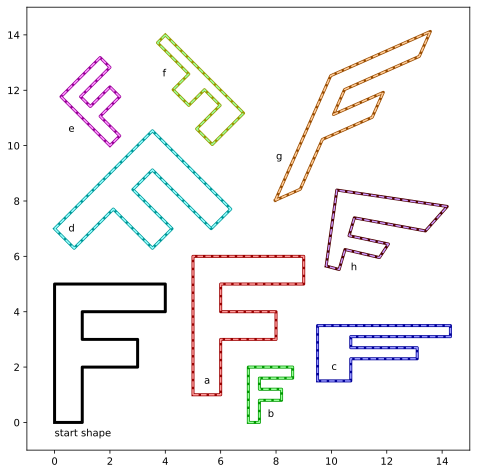

In [24]:
apply_and_draw_transforms()